In [ ]:
      Stock Portfolio Tracker

Q2. Create a stock portfolio tracking tool that allows users to add, remove, and track the performance of their
stock investments. Utilize financial APIs for real-time stock data.

C:\Users\LENOVO\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Added 10 shares of AAPL to portfolio.
Added 5 shares of TSLA to portfolio.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19272\3383046450.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return float(data['05. price'][0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19272\3383046450.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return float(data['05. price'][0])


Portfolio updated successfully.

Stock Portfolio:
Symbol | Quantity | Price | Value
AAPL | 10 | $220.73 | $2207.30
TSLA | 5 | $278.39 | $1391.95


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19272\3383046450.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return float(data['05. price'][0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19272\3383046450.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return float(data['05. price'][0])


Portfolio updated successfully.
Total Portfolio Value: $3599.25



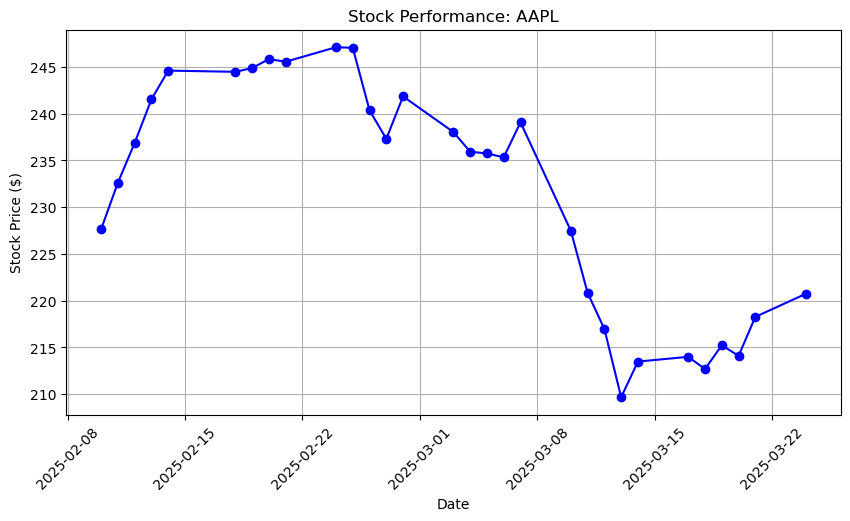

In [5]:

import json
import matplotlib.pyplot as plt
import sqlite3
from alpha_vantage.timeseries import TimeSeries

class StockPortfolio:
    def __init__(self):
        self.api_key = "0LYFX2IOSZDWTX1I."  # Replace with your actual Alpha Vantage API key
        self.base_url = "https://www.alphavantage.co/query"
        self.conn = sqlite3.connect("portfolio.db")
        self.create_table()
        self.load_portfolio()
    
    def create_table(self):
        cursor = self.conn.cursor()
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS stocks (
                symbol TEXT PRIMARY KEY,
                quantity INTEGER
            )
        """)
        self.conn.commit()
    
    def load_portfolio(self):
        cursor = self.conn.cursor()
        cursor.execute("SELECT symbol, quantity FROM stocks")
        rows = cursor.fetchall()
        self.portfolio = {symbol: {'quantity': quantity, 'price': 0, 'value': 0} for symboz, quantity in rows}
    
    def add_stock(self, symbol, quantity):
        cursor = self.conn.cursor()
        cursor.execute("INSERT OR REPLACE INTO stocks (symbol, quantity) VALUES (?, ?)", (symbol, quantity))
        self.conn.commit()
        self.portfolio[symbol] = {'quantity': quantity, 'price': 0, 'value': 0}
        print(f"Added {quantity} shares of {symbol} to portfolio.")
    
    def remove_stock(self, symbol):
        cursor = self.conn.cursor()
        cursor.execute("DELETE FROM stocks WHERE symbol = ?", (symbol,))
        self.conn.commit()
        self.portfolio.pop(symbol, None)
        print(f"Removed all shares of {symbol}.")
    
    def fetch_stock_price(self, symbol):
        ts = TimeSeries(key=self.api_key, output_format='pandas')
        try:
            data, meta_data = ts.get_quote_endpoint(symbol=symbol)
            return float(data['05. price'][0])
        except Exception as e:
            print(f"Error fetching stock data: {e}")
            return None
    
    def update_portfolio(self):
        total_value = 0
        for symbol in self.portfolio:
            price = self.fetch_stock_price(symbol)
            if price:
                self.portfolio[symbol]['price'] = price
                self.portfolio[symbol]['value'] = price * self.portfolio[symbol]['quantity']
                total_value += self.portfolio[symbol]['value']
        print("Portfolio updated successfully.")
        return total_value
    
    def display_portfolio(self):
        print("\nStock Portfolio:")
        print("Symbol | Quantity | Price | Value")
        for symbol, data in self.portfolio.items():
            print(f"{symbol} | {data['quantity']} | ${data['price']:.2f} | ${data['value']:.2f}")
        total_value = self.update_portfolio()
        print(f"Total Portfolio Value: ${total_value:.2f}\n")
    
    def plot_stock_performance(self, symbol):
        ts = TimeSeries(key=self.api_key, output_format='pandas')
        try:
            data, meta_data = ts.get_daily(symbol=symbol, outputsize='compact')
            dates = data.index[:30]
            prices = data['4. close'][:30]
            
            plt.figure(figsize=(10, 5))
            plt.plot(dates, prices, marker='o', linestyle='-', color='b')
            plt.xlabel("Date")
            plt.ylabel("Stock Price ($)")
            plt.title(f"Stock Performance: {symbol}")
            plt.xticks(rotation=45)
            plt.grid()
            plt.show()
        except Exception as e:
            print(f"Error fetching historical data: {e}")

if __name__ == "__main__":
    tracker = StockPortfolio()
    tracker.add_stock("AAPL", 10)
    tracker.add_stock("TSLA", 5)
    tracker.update_portfolio()
    tracker.display_portfolio()
    tracker.plot_stock_performance("AAPL")
